In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from typing import Dict
import tqdm
from icecream import ic
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
import plotly.graph_objects as go
import plotly.express as px

1) Download and visualize

In [12]:
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
Y = mushroom.data.targets 

df_mushroom = pd.DataFrame(X.join(Y))
df_copy = df_mushroom
CLASSES = list(df_mushroom['poisonous'].unique())
df_mushroom = df_mushroom.dropna()
df_mushroom

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,b,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8001,x,y,n,f,n,f,c,b,w,e,...,n,n,p,w,t,p,w,y,p,e
8038,x,y,g,t,n,f,c,b,w,e,...,w,w,p,w,t,p,w,y,p,e
8095,x,y,c,f,m,f,c,b,y,e,...,c,c,p,w,n,n,w,c,d,p


<Axes: >

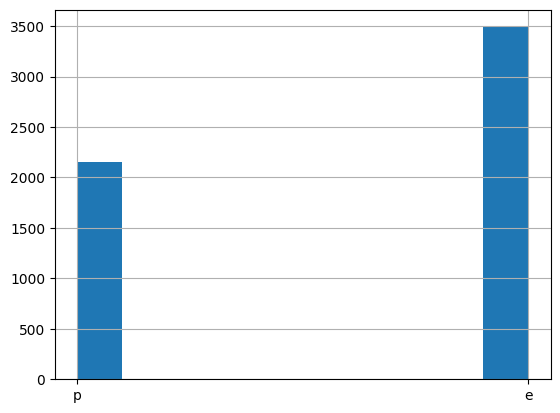

In [13]:
df_mushroom['poisonous'].hist()

<h4>Frequancy with one-hot label encoder</h4>

</h4>

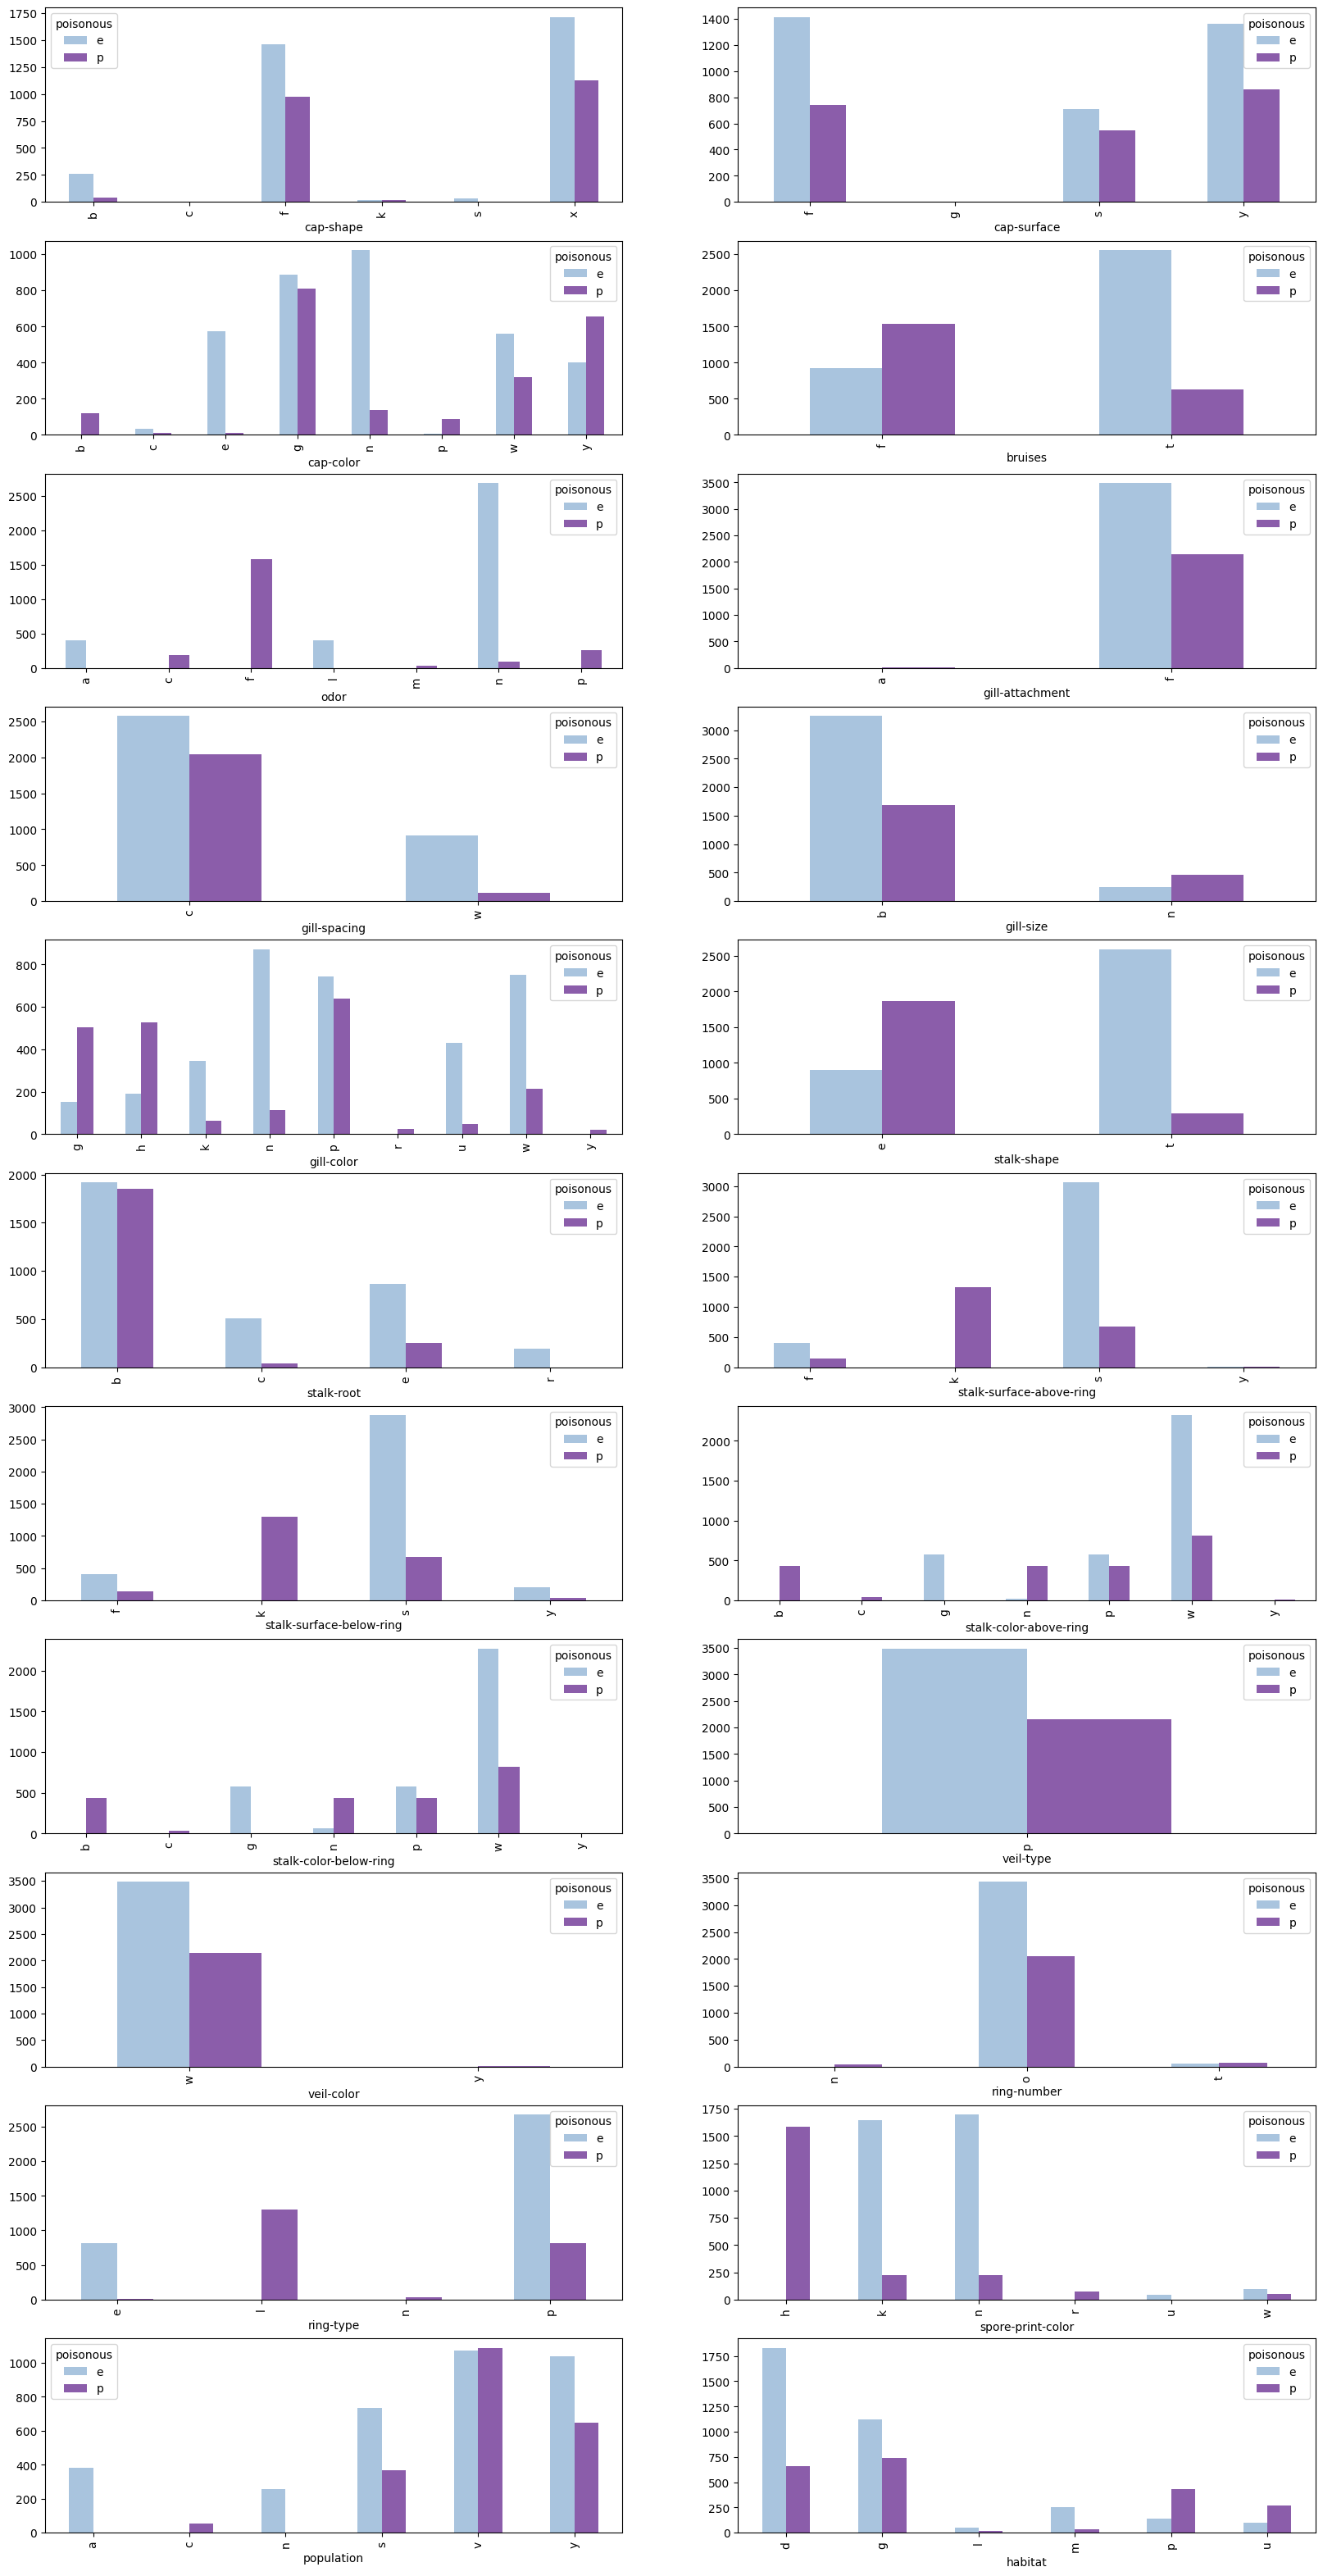

In [14]:
df_mushroom_f = pd.DataFrame()
columns = list(df_mushroom.drop('poisonous', axis = 1))
fig, axes = plt.subplots(11, 2, figsize=(20, 40))
for i, col in enumerate(columns):
    df_f = df_mushroom.groupby(col)['poisonous'].value_counts().unstack()
    df_f.plot.bar(ax=axes[i//2, i%2], color = sns.color_palette("BuPu", 2))
    df_f = df_f.rename(index=lambda x: df_f.index.name + '_' + x )
    df_mushroom_f =  pd.concat([df_mushroom_f, df_f])
plt.show()

In [15]:
df_mushroom_f.T.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
poisonous,,,,,,,,,,,,,,,,,,,,,
e,260.0,NaN,1460.0,20.0,32.0,1716.0,1416.0,NaN,712.0,1360.0,...,256.0,736.0,1072.0,1040.0,1832.0,1120.0,48.0,256.0,136.0,96.0
p,40.0,4.0,972.0,16.0,NaN,1124.0,744.0,4.0,548.0,860.0,...,NaN,368.0,1088.0,648.0,660.0,740.0,16.0,36.0,432.0,272.0


In [16]:
# Calculate frequncy for each class in table
def d_frequncy(x_feature, column_name, df) -> int:
    result_label = 0 # 1 for e and 0 for p
    with_same = df[df[column_name] == x_feature]
    if (len(with_same[with_same['poisonous'] == 'e']) > len(with_same[with_same['poisonous'] == 'p'])):
        result_label = 1
    return result_label
#
#                                               / - tp / fp
'''
def calculation_by_colymn(X, y, name_of_culmn) -> str:
    y_pred = 'e' # predicted var
    #for i in range(len(y)):
        
    return 0
'''

'''
n = len(df_mushroom)
colmn = df_mushroom.columns
y = df_mushroom['poisonous']
array_of_res = []
#y_pred = [0 for i in range(n)]
# calculate for each column( feature in cicle)
for name in columns: # in num of columns
    df_by_col = df_mushroom[name]
    y_pred = [d_frequncy(df_by_col[i], name, df_mushroom) for i in range(n)]
'''
dict_for_label = {'e' : 0, 'p' : 1}
rows = df_mushroom.shape[0]
Y = df_mushroom['poisonous'].map(dict_for_label)
acc = [[]]
# for Roc and pr curves
predicted_by_col = [[], [], []]
col_to_pred = ['bruises', 'odor', 'population']
pred_index = 0
#
dict_of_acc = {}
for i, col in enumerate(columns):
    y_pred = []
    for r in range(rows):
        value = str(col) + '_' + str(df_mushroom.iloc[r][col])
        y_pred.append(dict_for_label[(df_mushroom_f.T[value].idxmax())])
        if( col in col_to_pred):
            predicted_by_col[pred_index].append(
                dict_for_label[(df_mushroom_f.T[value].idxmax())])
    if( col in col_to_pred):
        pred_index += 1
    acc[0].append(metrics.accuracy_score(Y, y_pred))
    print(col + ': '+ str('%.3f' % (acc[0][i] * 100)))
    dict_of_acc[col] = str('%.3f' % (acc[0][i] * 100))

    

cap-shape: 61.871
cap-surface: 61.871
cap-color: 69.880
bruises: 72.502
odor: 98.441
gill-attachment: 62.119
gill-spacing: 61.800
gill-size: 65.769
gill-color: 74.805
stalk-shape: 79.022
stalk-root: 61.800
stalk-surface-above-ring: 85.400
stalk-surface-below-ring: 84.763
stalk-color-above-ring: 77.605
stalk-color-below-ring: 76.754
veil-type: 61.800
veil-color: 61.942
ring-number: 62.863
ring-type: 85.400
spore-print-color: 91.141
population: 63.005
habitat: 70.163


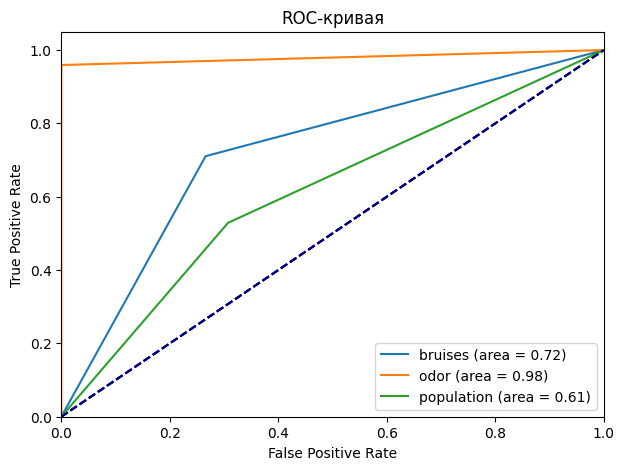

'\n# Build pr-curve\nfig = go.Figure()\nfig.add_shape(\n    type=\'line\', line=dict(dash=\'dash\'),\n    x0=0, x1=1, y0=1, y1=0\n)\n\nfor i in range(np_copy.shape[1]):\n    y_true = Y\n    y_score = np_copy[:, i]\n\n    precision, recall, _ = precision_recall_curve(y_true, y_score)\n    auc_score = average_precision_score(y_true, y_score)\n\n    name = f"{col_to_pred[i]} (AP={auc_score:.2f})"\n    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode=\'lines\'))\n\nfig.update_layout(\n    xaxis_title=\'Recall\',\n    yaxis_title=\'Precision\',\n    yaxis=dict(scaleanchor="x", scaleratio=1),\n    xaxis=dict(constrain=\'domain\'),\n    width=700, height=500\n)\nfig.show()\n'

In [17]:
np_copy = np.array(predicted_by_col)
# Build roc curve in cycle
plt.figure(figsize=(7,5))
for index, col_name in enumerate(col_to_pred):

    fpr, tpr, treshold = roc_curve(Y, np_copy[index])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr,
            label=f'{col_name} (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая')
    plt.legend(loc="lower right")
plt.show()

'''
# Build pr-curve
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

for i in range(np_copy.shape[1]):
    y_true = Y
    y_score = np_copy[:, i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = f"{col_to_pred[i]} (AP={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()
'''

<h4>Frequancy with one-hot encoder</h4>

In [22]:
# Let's use one-hot encoder for table
# In fact we will predict e or p by the maximum of them at the column

def frequancy_in_column(col) -> np.int8:
    label = 0

    
    

    return 0


dict_for_label = {'e' : 0, 'p' : 1}
df = df_copy
X = df.drop(columns='poisonous')
y = df['poisonous'].map(dict_for_label)

X = pd.get_dummies(X, columns = X.columns)

predicted_by_col = [[], [], []]
#  col_to_pred = ['bruises', 'odor', 'population']

print(X.head(10))

   cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s   
0        False        False        False        False        False  \
1        False        False        False        False        False   
2         True        False        False        False        False   
3        False        False        False        False        False   
4        False        False        False        False        False   
5        False        False        False        False        False   
6         True        False        False        False        False   
7         True        False        False        False        False   
8        False        False        False        False        False   
9         True        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y   
0         True          False          False           True          False  \
1         True          False          False           True          Fals

Bias with One-hot Encoder

In [26]:
df_mushroom = df_copy


X = pd.get_dummies(df_mushroom.drop(['poisonous'], axis=1))
y = df_mushroom['poisonous'].map(dict_for_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


[[1281   97]
 [   1 1302]]
the metric acc = 0.9634464751958225
the metric prec = 0.9306647605432452
the metric rec = 0.9992325402916347
the metric f1 = 0.9637305699481866


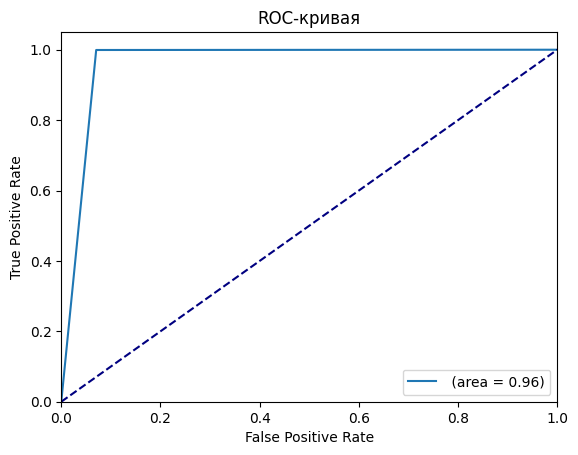

In [29]:
model = GaussianNB()
y_pred = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')

# Roc curve
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
            label=f' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая')
plt.legend(loc="lower right")

<h4>With Label Encoder</h4>

In [31]:
# Another way is use "LabelEncoder"
df_mushroom = df_copy

labelencoder=LabelEncoder()

X = df_mushroom.drop(['poisonous'], axis=1)
colmn = X.columns
for ind, col in enumerate(colmn):
    X[col] = labelencoder.fit_transform(X[col].values)
y = df_mushroom['poisonous'].map(dict_for_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


[[1294   84]
 [ 109 1194]]
the metric acc = 0.928011935844834
the metric prec = 0.9342723004694836
the metric rec = 0.9163468917881811
the metric f1 = 0.9252227818674932


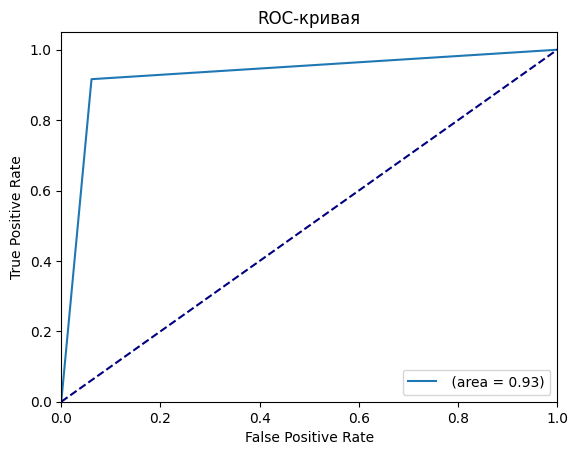

In [32]:
model = GaussianNB()
y_pred = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')

# Roc curve
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
            label=f' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая')
plt.legend(loc="lower right")

My own bias

In [34]:
from my_naive_bias import Naive_Bayes

[[838   5]
 [ 12 770]]
the metric acc = 0.9895384615384616
the metric prec = 0.9935483870967742
the metric rec = 0.9846547314578005
the metric f1 = 0.9890815671162491


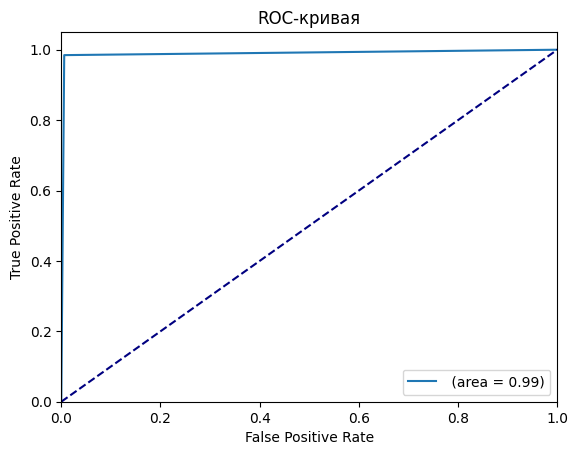

In [37]:
model = Naive_Bayes()
data = pd.read_csv("./data/mushrooms.csv")

xs = data.drop('class', axis=1)
ys = data['class'].map(dict_for_label)

xs = pd.get_dummies(xs)

X_train, X_test, y_train, y_test = train_test_split(xs.values, ys, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#print(classification_report(y_test, y_pred))

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')

# Roc curve
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
            label=f' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая')
plt.legend(loc="lower right")

[[811  32]
 [ 20 762]]
the metric acc = 0.968
the metric prec = 0.9596977329974811
the metric rec = 0.9744245524296675
the metric f1 = 0.967005076142132


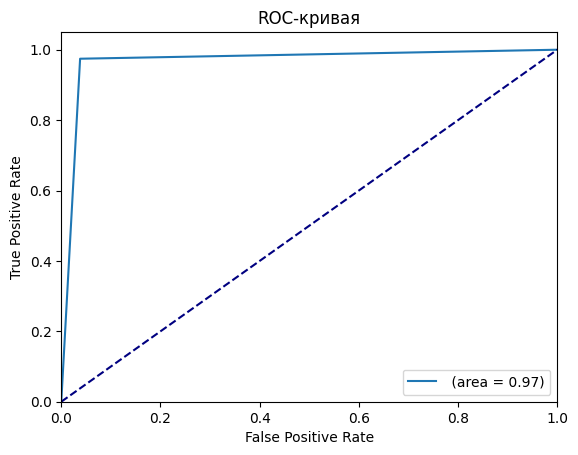

In [38]:
from sklearn.linear_model import LogisticRegression
from scipy.special import logit


# Создание и обучение модели
model = CategoricalNB()
model.fit(X_train, y_train)

# Получим оценки вероятностей принадлежности к классам
probabilities = model.predict_proba(X_train)[:, 1]

# epsilon для избежания бесконечностей после логит-функции
eps = 1e-15
probabilities = probabilities.clip(eps, 1 - eps)
transformed_probabilities = logit(probabilities)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(transformed_probabilities.reshape(-1, 1), y_train)

# Предсказание на тестовых данных
test_probabilities = model.predict_proba(X_test)[:, 1]
test_probabilities = test_probabilities.clip(eps, 1 - eps)
transformed_test_probabilities = logit(test_probabilities)
y_pred = logreg.predict(transformed_test_probabilities.reshape(-1, 1))

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

metrics_h = []

metrics_h.append([metrics.accuracy_score(y_test, y_pred), 'acc'])
metrics_h.append([metrics.precision_score(y_test, y_pred), 'prec'])
metrics_h.append([metrics.recall_score(y_test, y_pred), 'rec'])
metrics_h.append([metrics.f1_score(y_test, y_pred), 'f1'])


for el, metr in metrics_h:
    print(f"the metric {metr} = {el}", end='\n')

# Roc curve
fpr, tpr, treshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,
            label=f' (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC-кривая')
plt.legend(loc="lower right")